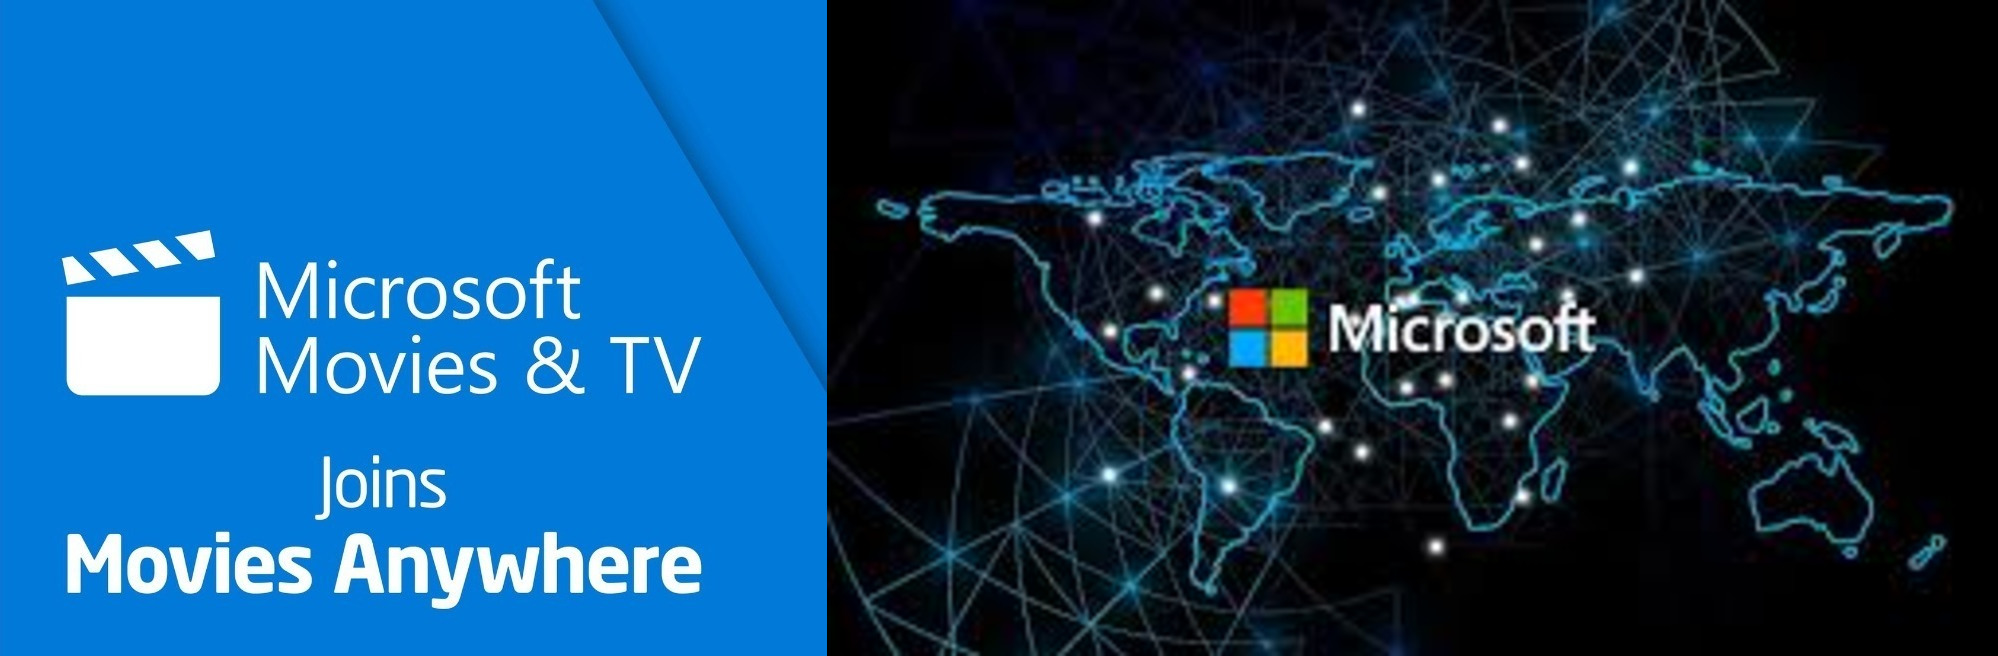

##**DSC-PHASE-1-PROJECT**

###Student name: Milsort Jeptoo Kemboi
###Student pace: part time
###Scheduled project review date/time:  
###Instructor name: Samwel Jane & Veronica Isiaho
###Blog post URL:

## **MICROSOFT'S NEW MOVIE STORE STUDIO**

### **Project Overview**
This analysis is for Microsoft and they want me to use this analysis to generate insights for the business stakeholder"

### **Business Problem**

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### **Data Source**

The data sources for the project contains datasets from various prominent movie databases. These sources include [Box Office Mojo](https://www.boxofficemojo.com), [IMDB](https://www.imdb.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), [TheMovieDB](https://www.themoviedb.org/), and [The numbers](https://www.the-numbers.com/). Each of these datasets provides comprehensive information on movie performance, ratings, and other relevant metrics.

For the project i used the following datasets;

*   **bom.movie_gross:** *title, studio, domestic_gross, foreign_gross, year*  
 which provides the financial data on movies, including gross earnings domestically and internationally, along with the studio that produced them and the year of release.

*  **tmdb.movies:** *genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count* which contains data from The Movie Database (TMDb) on movies, covering their genres, popularity, ratings, release dates, and languages.

*   **rt.movie_info:** *id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio* containing data from Rotten Tomatoes and Box office, including synopses, ratings, genres, directors, writers, release dates, box office earnings, runtime, and studios.

*   **rt.reviews:** *id, review, rating, fresh, critic, top_critic, publisher, date* Contains reviews from Rotten Tomatoes, including the review text, ratings, whether the review is "fresh" or not, critic details, and publication dates.

*   **tn.movie_budgets:** *id, release_date, movie, production_budget, domestic_gross, worldwide_gross, Most_Sales* Contains budget and revenue information for movies, including the unique identifier for each movie, release dates, titles, production budgets, domestic and worldwide gross earnings, and the region with the highest sales.

The ERD Diagram for the dataset is as shown;

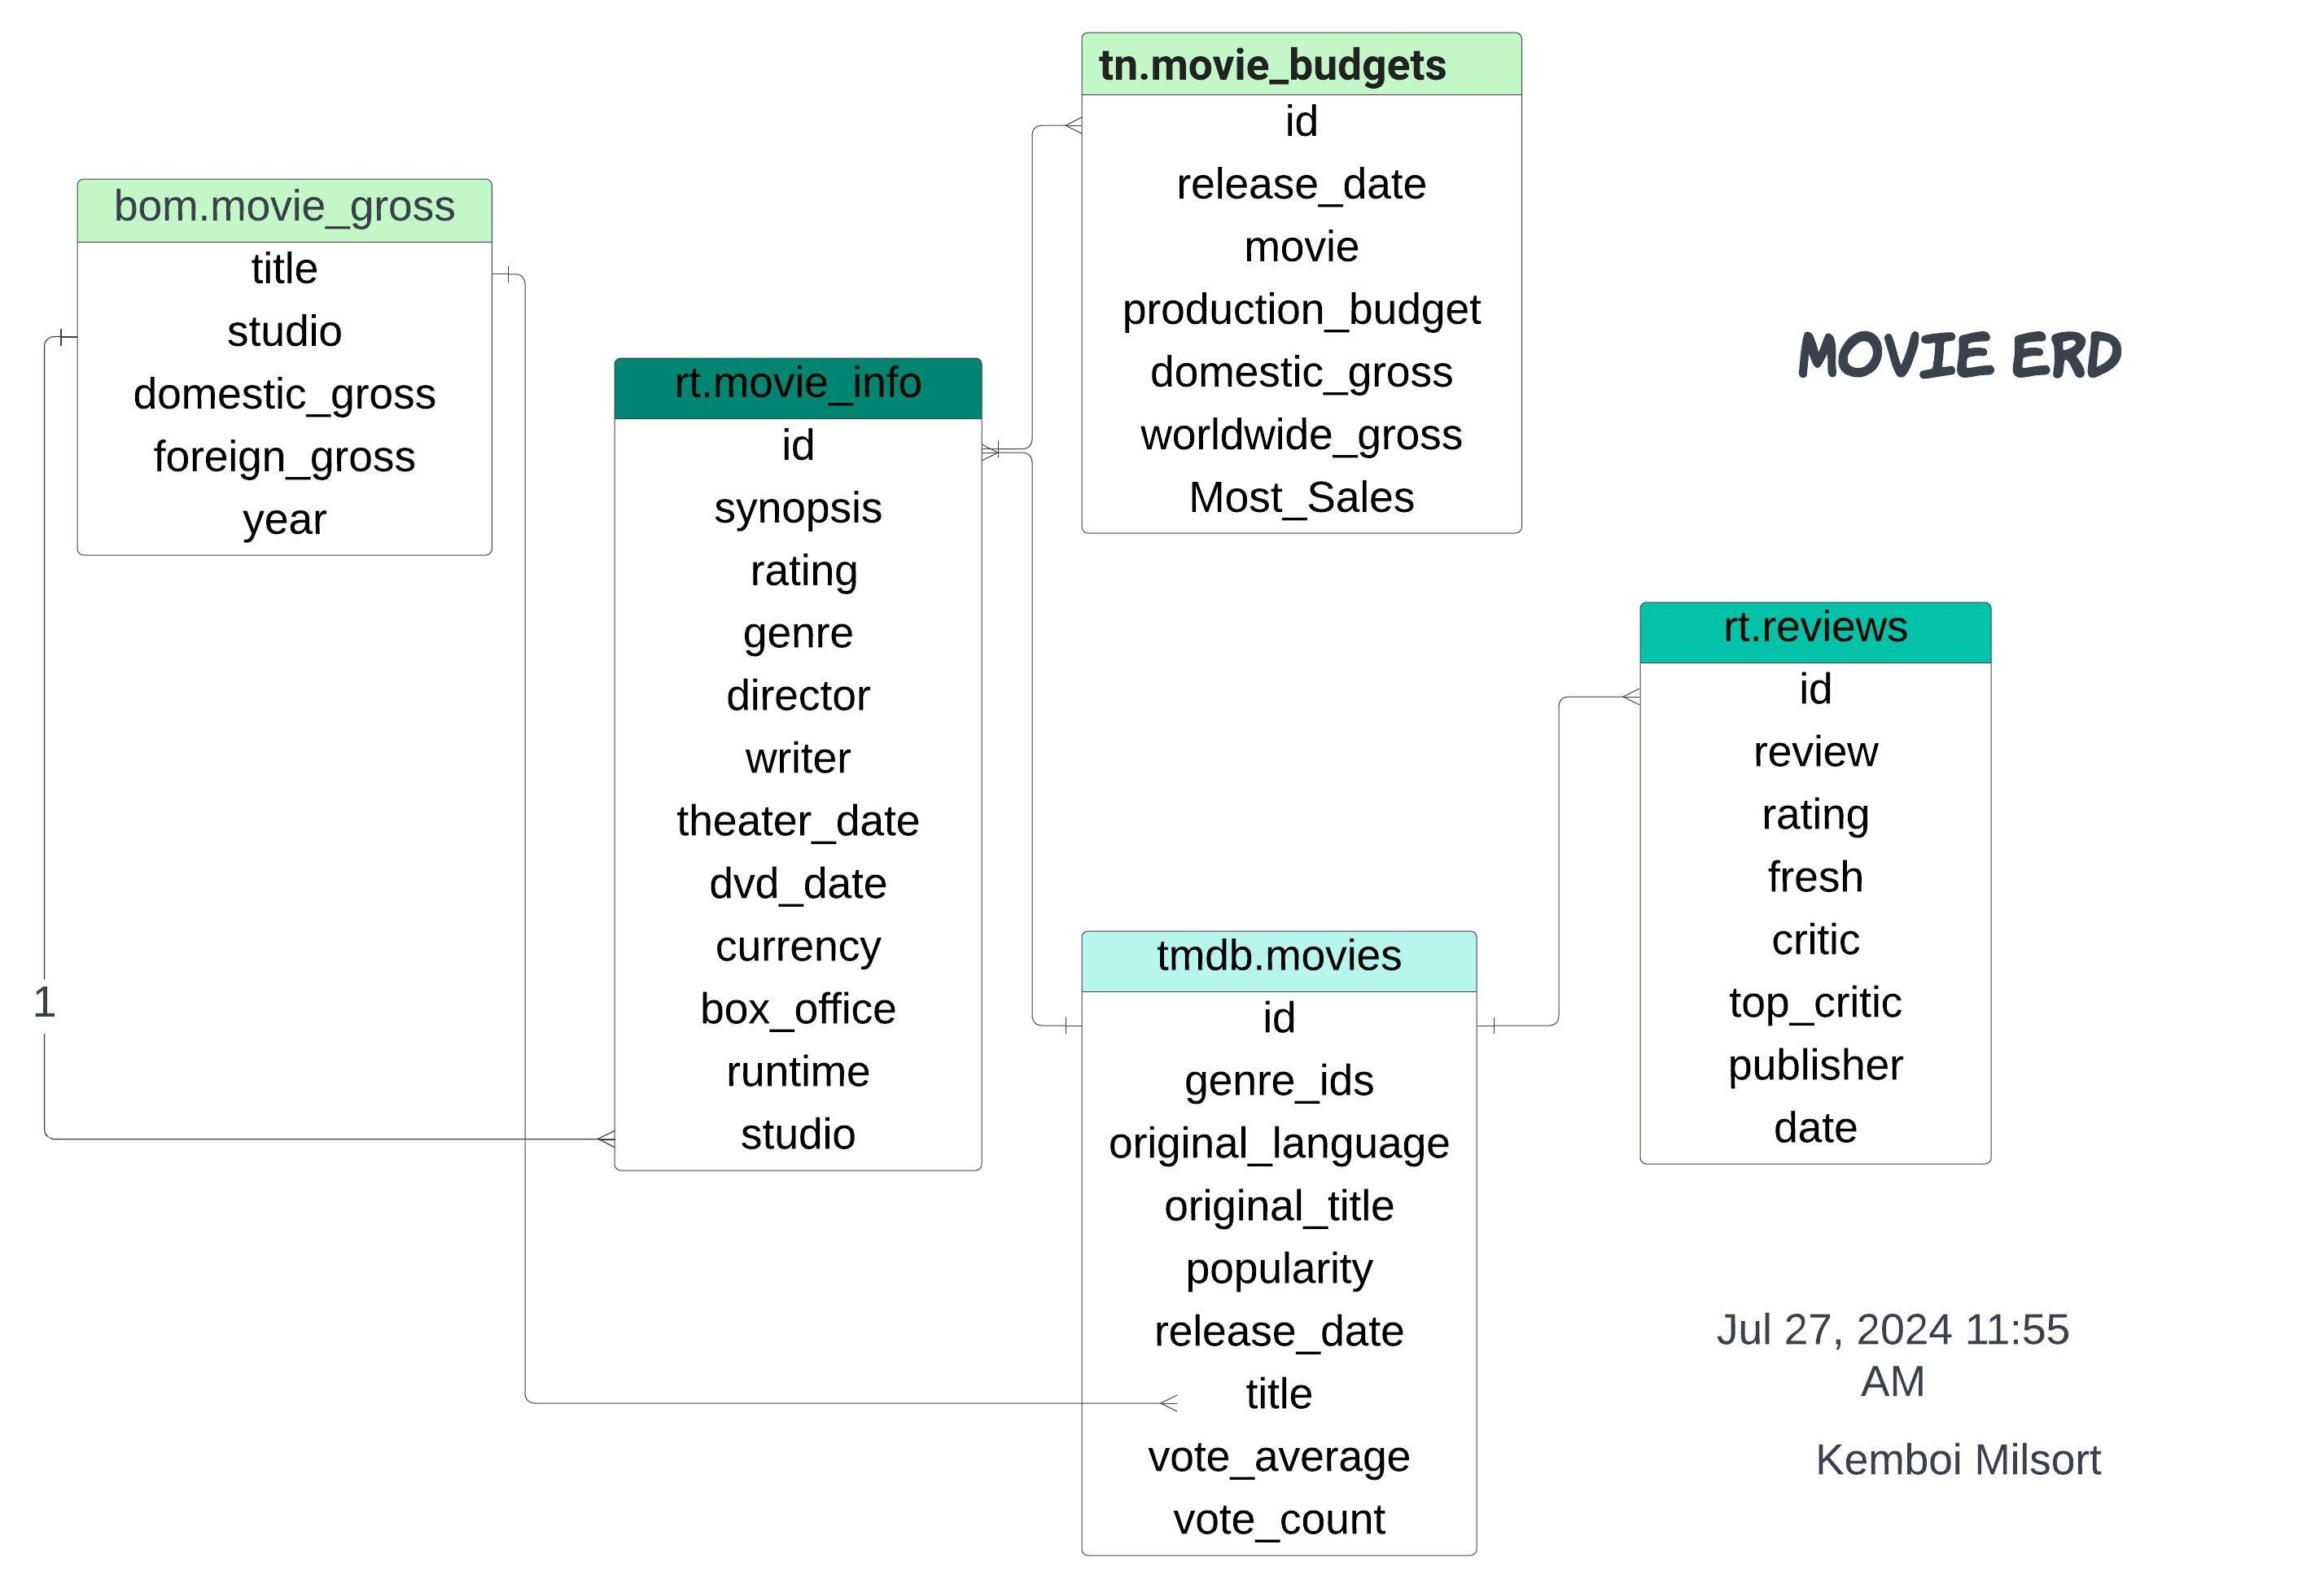


In [453]:
# Importing libraries at this point

import pandas as pd # For data manipulation and analysis
import numpy as np # NumPy is used for numerical operations and array manipulation
import matplotlib.pyplot as plt # Matplotlib is for creating static, animated, and interactive visualizations
import seaborn as sns # Seaborn is used for creating informative and attractive statistical graphics

In [454]:
# Loading datasets into DataFrames. Some of the datasets are in compressed CSV (comma-separated values) and two are in TSV (tab-separated values) formats.
bom_movie_gross = pd.read_csv('/content/bom.movie_gross.csv') # Load bom_movie_gross data
tmdb_movies = pd.read_csv('/content/tmdb.movies.csv')  # Load tmdb_movie data
rt_movie_info = pd.read_csv('/content/rt.movie_info.tsv', sep='\t', encoding='ISO-8859-1') # Load rt_movie_info data
rt_reviews= pd.read_csv('/content/rt.reviews.tsv', sep='\t', encoding='ISO-8859-1') # Load rt_reviews data
tn_movie_budgets = pd.read_csv('/content/tn.movie_budgets.csv') # Load tn_movie_budgets data

## **DATA CLEANING**

Data cleaning is a crucial step in preparing data for analysis. Data cleaning  is the process of preparing data for analysis. This includes identifying and removing errors, filling in missing values, and dealing with outliers. Data cleaning and preparation is essential for ensuring that the data is accurate and ready for analysis.

To check the data one needs to 1st understand the data by:

In [ ]:
print(bom_movie_gross.head())
print(tmdb_movies.head())
print(rt_movie_info.head())
print(rt_reviews.head())
print(tn_movie_budgets.head())

From the output above;


*  There are missing vales on several tables, Unnamed column on tmdb_movies table, strings values on domestic_gross and foreign_gross which incluses currency symbol and commas. Also we have duplicated and difference in data types.

####**1.   Handling missing data**




In [456]:
# Fill missing values for numeric columns with median and categorical columns with mode
def fill_missing_values(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        df[column].fillna(df[column].median(), inplace=True)
    for column in df.select_dtypes(include=['object']).columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    return df

bom_movie_gross = fill_missing_values(bom_movie_gross)
name_basics = fill_missing_values(name_basics)
title_akas = fill_missing_values(title_akas)
title_basics = fill_missing_values(title_basics)
title_principals = fill_missing_values(title_principals)
rt_movie_info = fill_missing_values(rt_movie_info)
rt_reviews = fill_missing_values(rt_reviews)
tn_movie_budgets = fill_missing_values(tn_movie_budgets)

In [ ]:
# Checking if we still have any missing data
bom_movie_gross .isnull().sum()


In [ ]:
# Checking if we still have any missing data
rt_movie_info.isnull().sum()


In [ ]:
# Checking if we still have any missing data
rt_reviews.isnull().sum()


In [ ]:
# Checking if we still have any missing data
tn_movie_budgets.isnull().sum()


In [ ]:
# Checking if we still have any missing data
tmdb_movies.isnull().sum()

####**2.   Renaming column Name**



In [457]:
# Rename 'Unnamed: 0' column to 'id' on the tmdb_movie table
if 'Unnamed: 0' in tmdb_movies.columns:
    tmdb_movies.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

####**3.   Change string to numerics**

In [460]:
# Ensure popularity, vote_average, and vote_count are numeric
tmdb_movies['popularity'] = pd.to_numeric(tmdb_movies['popularity'], errors='coerce')
tmdb_movies['vote_average'] = pd.to_numeric(tmdb_movies['vote_average'], errors='coerce')
tmdb_movies['vote_count'] = pd.to_numeric(tmdb_movies['vote_count'], errors='coerce')

####**4.   Drop duplicate values**

In [ ]:
# Drop duplicates
bom_movie_gross.drop_duplicates(inplace=True)
tmdb_movies.drop_duplicates(inplace=True)
rt_movie_info.drop_duplicates(inplace=True)
rt_reviews.drop_duplicates(inplace=True)
tn_movie_budgets.drop_duplicates(inplace=True)

## **EXPLORATORY DATA ANALYSIS (EDA)**

Now Lets look at the differences between Subsets including;

* **Genre:** Analyze financial performance across different genres.
* **Studio:** Compare the performance of movies produced by different studios.
* **Year:** Examine trends and changes in movie performance over the years
* **Release Date:** Assess the impact of release dates
* **language**

In [ ]:
# Check columns in bom_movie_gross
print("Columns in bom_movie_gross:")
print(bom_movie_gross.columns)

# Check columns in tn_movie_budgets
print("Columns in tn_movie_budgets:")
print(tn_movie_budgets.columns)

# Check columns in rt_movie_info
print("Columns in rt_movie_info:")
print(rt_movie_info.columns)

# Check columns in tmdb_movies
print("Columns in tmdb_movies:")
print(tmdb_movies.columns)

# Check columns in rt.reviews
print("Columns in tmdb_movies:")
print(rt_reviews.columns)

# Merging Tables

In [458]:
# Merge bom.movie_gross with tn_movie_budgets on title/movie
merged_bom_movie_tn = pd.merge(bom_movie_gross, tn_movie_budgets, left_on='title', right_on='movie')

# Merge bom.movie_gross with tn_movie_budgets on title/movie
movies = pd.merge(merged_bom_movie_tn, tmdb_movies, left_on='title', right_on='title')

# Merge bom.movie_gross with tn_movie_budgets on title/movie
combined_movies = pd.merge(merged_bom_movie_tn, rt_movie_info, left_on='id', right_on='id')

# Merge bom.movie_gross with tn_movie_budgets on title/movie
Combined_data = pd.merge(movies,combined_movies, left_on='title', right_on='title')

In [449]:
# Check columns in Combined_data
print("Columns in Combined_data:")
print(Combined_data.columns)

Columns in Combined_data:
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross_y_x',
       'worldwide_gross', 'Most_Sales', 'id_y', 'genre_ids', 'id_y',
       'original_language', 'original_title', 'popularity', 'release_date_y',
       'vote_average', 'vote_count', 'studio', 'domestic_gross_x_y',
       'foreign_gross', 'year_y', 'id', 'release_date', 'movie_y',
       'production_budget_y', 'domestic_gross_y_y', 'worldwide_gross_y',
       'Most_Sales_y', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio_y'],
      dtype='object')


In [463]:
# Check and rename any '_x' or '_y' suffix columns
columns_to_rename = {
    'domestic_gross_x_x': 'domestic_gross',
    'foreign_gross_x': 'foreign_gross',
    'year_x': 'year',
    'id_x': 'id',
    'Most_Sales_x': 'Most_Sales',
    'release_date_x': 'release_date',
    'movie_x': 'movie',
    'production_budget_x': 'production_budget',
    'studio_x': 'studio',
    'worldwide_gross_x': 'worldwide_gross',
}
Combined_data.rename(columns=columns_to_rename, inplace=True)

In [451]:
# Checking the dimensionality of the data
Combined_data.shape

(1149, 43)

In [461]:
Combined_data .head()

,title,studio,domestic_gross_x_x,foreign_gross_x,year_x,id_x,release_date_x,movie_x,production_budget_x,domestic_gross_y_x,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio_y
0,Inception,WB,292600000.0,535700000,2010,38,16-Jul-10,Inception,"$160,000,000","$292,576,195",...,R,Art House and International|Classics|Horror|My...,Roy Ward Baker,Anthony Hinds|John Elder,"Dec 23, 1970","Aug 7, 2001",$,"20,900,803",96 minutes,Universal Pictures
1,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,21-May-10,Shrek Forever After,"$165,000,000","$238,736,787",...,NR,Musical and Performing Arts,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"20,900,803",90 minutes,Universal Pictures
2,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,30-Jun-10,The Twilight Saga: Eclipse,"$68,000,000","$300,531,751",...,PG,Drama|Romance,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"20,900,803",112 minutes,Universal Pictures
3,Iron Man 2,Par.,312400000.0,311500000,2010,15,7-May-10,Iron Man 2,"$170,000,000","$312,433,331",...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",$,"20,900,803",108 minutes,Universal Pictures
4,Tangled,BV,200800000.0,391000000,2010,15,24-Nov-10,Tangled,"$260,000,000","$200,821,936",...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",$,"20,900,803",108 minutes,Universal Pictures


In [509]:
# Remove dollar signs and commas, then convert to numeric
for column in ['production_budget', 'domestic_gross', 'foreign_gross', 'domestic_gross', 'worldwide_gross']:
   Combined_data [column] = Combined_data [column].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df= pd.DataFrame(Combined_data)
# Calculate net revenue
df['net_revenue'] = df['worldwide_gross'] - df['production_budget']

# Display the updated DataFrame
print("\nUpdated DataFrame with Revenue:")
print(df)


In [511]:
# Checks at the first row after removing the dollar signs
Combined_data .head()

,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y_x,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio_y
0,Inception,WB,292600000.0,535700000.0,2010,38,16-Jul-10,Inception,160000000.0,"$292,576,195",...,R,Art House and International|Classics|Horror|My...,Roy Ward Baker,Anthony Hinds|John Elder,"Dec 23, 1970","Aug 7, 2001",$,"20,900,803",96 minutes,Universal Pictures
1,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,27,21-May-10,Shrek Forever After,165000000.0,"$238,736,787",...,NR,Musical and Performing Arts,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"20,900,803",90 minutes,Universal Pictures
2,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,53,30-Jun-10,The Twilight Saga: Eclipse,68000000.0,"$300,531,751",...,PG,Drama|Romance,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"20,900,803",112 minutes,Universal Pictures
3,Iron Man 2,Par.,312400000.0,311500000.0,2010,15,7-May-10,Iron Man 2,170000000.0,"$312,433,331",...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",$,"20,900,803",108 minutes,Universal Pictures
4,Tangled,BV,200800000.0,391000000.0,2010,15,24-Nov-10,Tangled,260000000.0,"$200,821,936",...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",$,"20,900,803",108 minutes,Universal Pictures


#**Data Aggregations**

In [560]:
#Total Net Revenue by Genre
total_net_revenue_by_genre = df.groupby('genre')['net_revenue'].sum().reset_index()
print("Total Net Revenue by Genre:")
print(total_net_revenue_by_genre)


Total Net Revenue by Genre:
                                                genre   net_revenue
0                                Action and Adventure  1.480673e+09
1   Action and Adventure|Art House and Internation...  9.536405e+08
2                 Action and Adventure|Classics|Drama  7.273556e+08
3   Action and Adventure|Classics|Drama|Mystery an...  3.273279e+09
4                   Action and Adventure|Comedy|Drama  1.484951e+09
5    Action and Adventure|Comedy|Mystery and Suspense  1.416358e+09
6                          Action and Adventure|Drama  2.248274e+09
7   Action and Adventure|Drama|Horror|Mystery and ...  2.355228e+08
8     Action and Adventure|Drama|Mystery and Suspense  2.668679e+09
9   Action and Adventure|Drama|Science Fiction and...  5.079826e+09
10                 Action and Adventure|Drama|Western  1.641149e+09
11          Action and Adventure|Mystery and Suspense  3.814894e+09
12  Action and Adventure|Mystery and Suspense|Scie...  1.865596e+09
13   Action and Adve

In [558]:

# Median Vote Count by Year
median_vote_count_by_year = df.groupby('year')['vote_count'].median().reset_index()
print("\nMedian Vote Count by Year:")
print(median_vote_count_by_year)



Median Vote Count by Year:
   year  vote_count
0  2010       856.5
1  2011       853.0
2  2012       982.0
3  2013      1421.5
4  2014      1079.5
5  2015      1549.0
6  2016      1855.0
7  2017      1611.5
8  2018       925.0


In [ ]:

# Standard Deviation of Popularity by Language
std_popularity_by_language = df.groupby('original_language')['popularity'].std().reset_index()
print("\nStandard Deviation of Popularity by Language:")
print(std_popularity_by_language)

# **Visualizing the distributions**

##**a) Revenue**

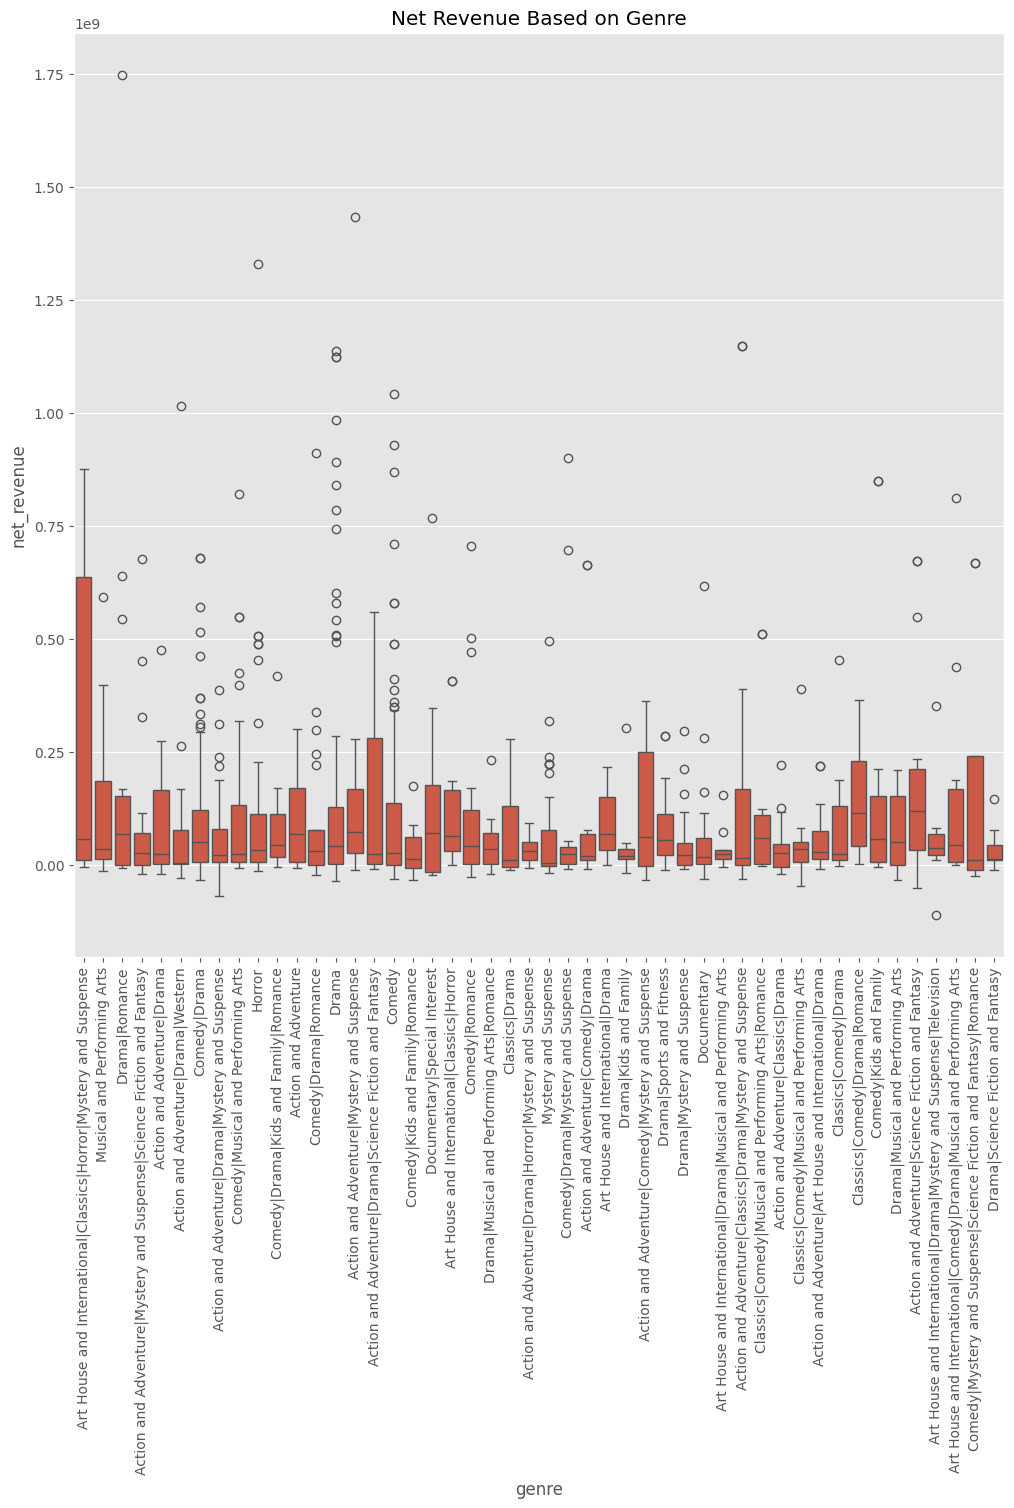

In [508]:
#Net revenue based on movie genres
plt.style.use('ggplot') # Indicates the plot style
plt.figure(figsize=(12,12)) # creates the plot
sns.boxplot(x='genre', y='net_revenue', data=df)

# labeling and saving the plot
plt.title('Net Revenue Based on Genre') #Title
plt.xticks(rotation=90)
plt.savefig('genres_nr.png')
plt.show()

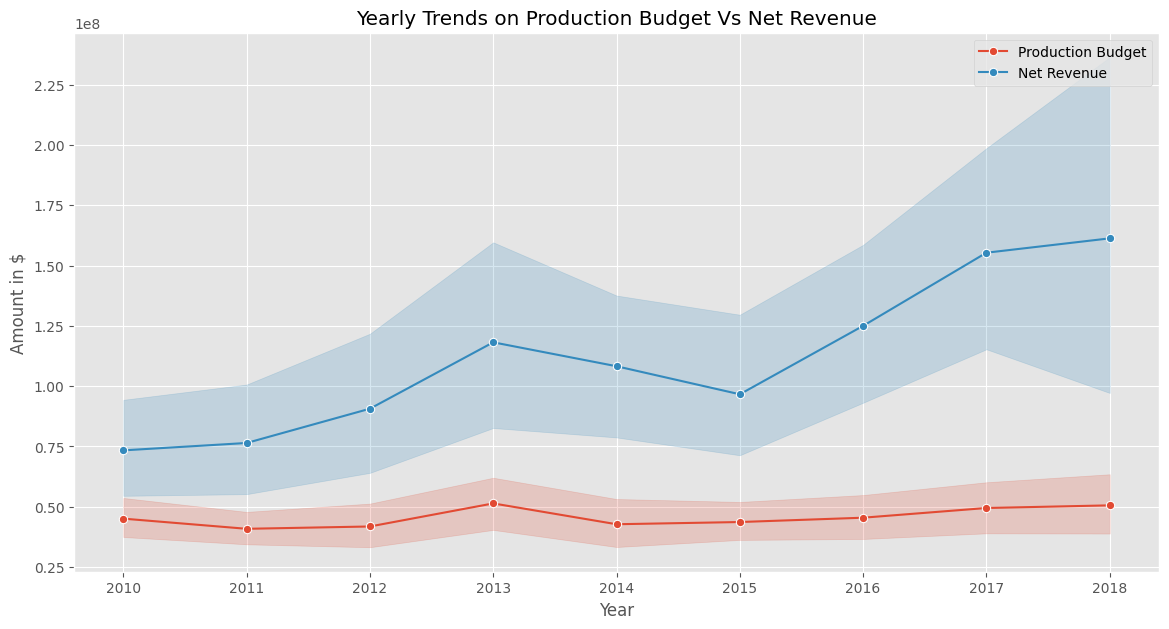

In [481]:
# Yearly Trends on Production Budget Vs Net Revenue
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='production_budget', data=df, marker='o', label='Production Budget')
sns.lineplot(x='year', y='net_revenue', data=df, marker='o', label='Net Revenue')
plt.title('Yearly Trends on Production Budget Vs Net Revenue')
plt.xlabel('Year')
plt.ylabel('Amount in $')
plt.savefig('Prod_Rev.png')
plt.legend()
plt.show()

In [478]:
# Calculate correlation between production_budget and net_revenue
correlation = df[['production_budget', 'net_revenue']].corr()
print("Correlation between production_budget and net_revenue:")
print(correlation)

Correlation between production_budget and net_revenue:
                   production_budget  net_revenue
production_budget           1.000000     0.670677
net_revenue                 0.670677     1.000000


The correlation coefficient ranges from -1 to 1.
1.   A value of 1 indicates a perfect positive correlation.
2.   A value of -1 indicates a perfect negative correlation.
3.   A value of 0 indicates no correlation.

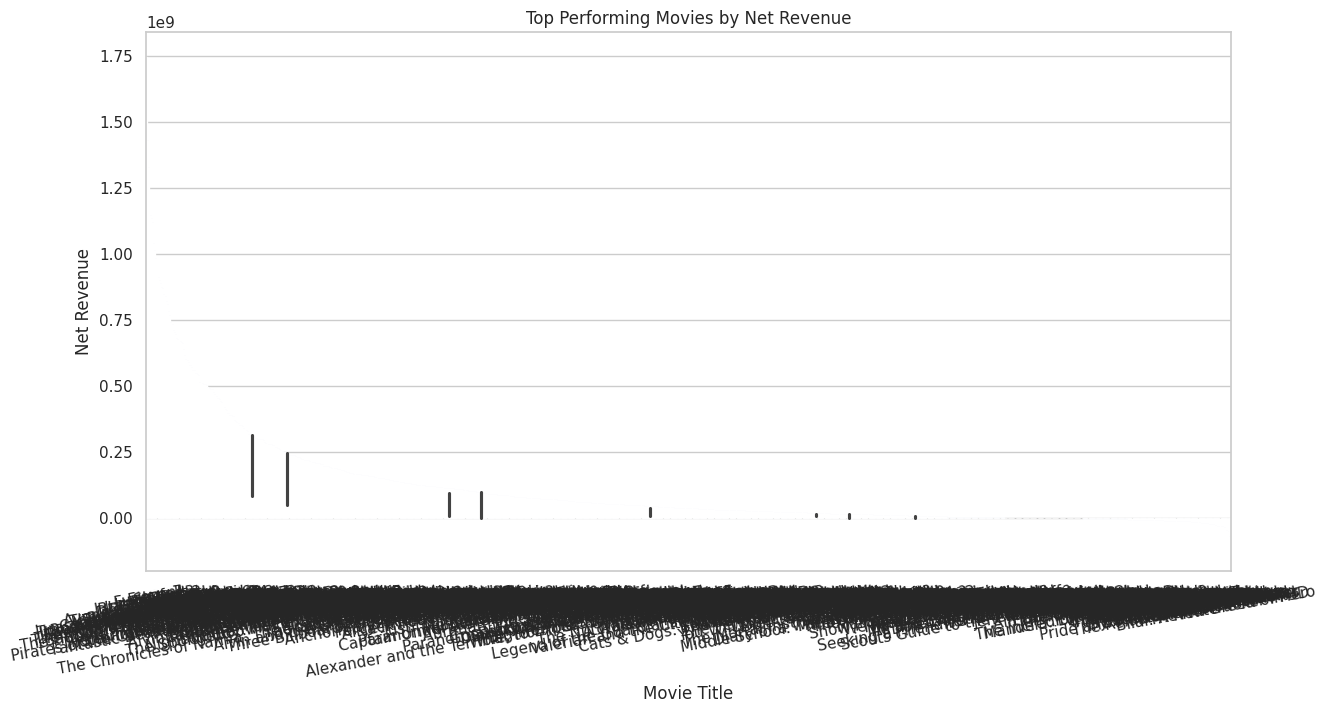

In [561]:
# Top Performing Movies by Net Revenue
top_movies = df.sort_values(by='net_revenue', ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(x='title', y='net_revenue', data=top_movies)
plt.title('Top Performing Movies by Net Revenue')
plt.xlabel('Movie Title')
plt.xticks(rotation=10)
plt.savefig('Performance.png')
plt.ylabel('Net Revenue')
plt.show()

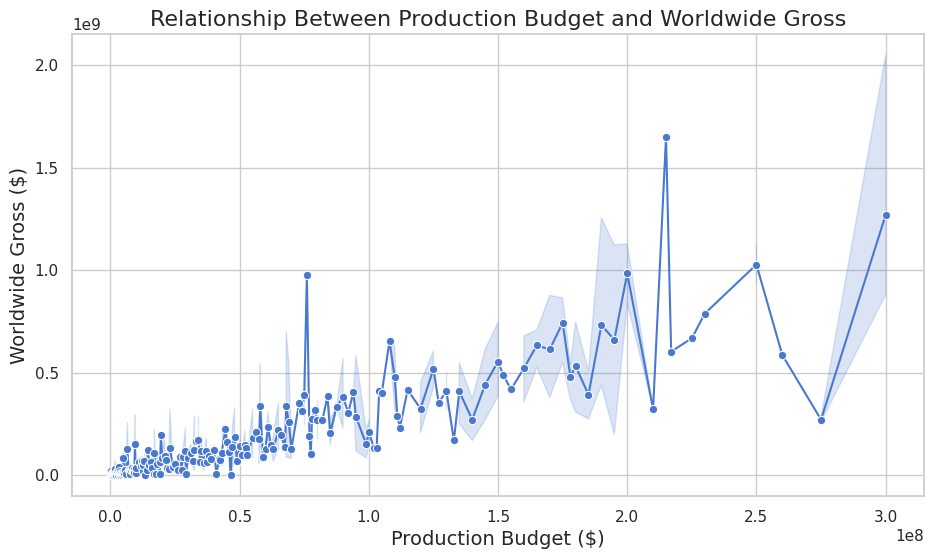

In [562]:
# Relationship Between Production Budget and Worldwide Gross
df_sorted = df.sort_values(by='production_budget')

# Create a line plot
plt.figure(figsize=(11, 6))
sns.lineplot(x='production_budget', y='worldwide_gross', data=df_sorted, marker='o')

# Labeling
plt.title('Relationship Between Production Budget and Worldwide Gross', fontsize=16)
plt.xlabel('Production Budget ($)', fontsize=14)
plt.ylabel('Worldwide Gross ($)', fontsize=14)
plt.grid(True)
plt.savefig('Relationship.png')

plt.show()

##**b) Language**

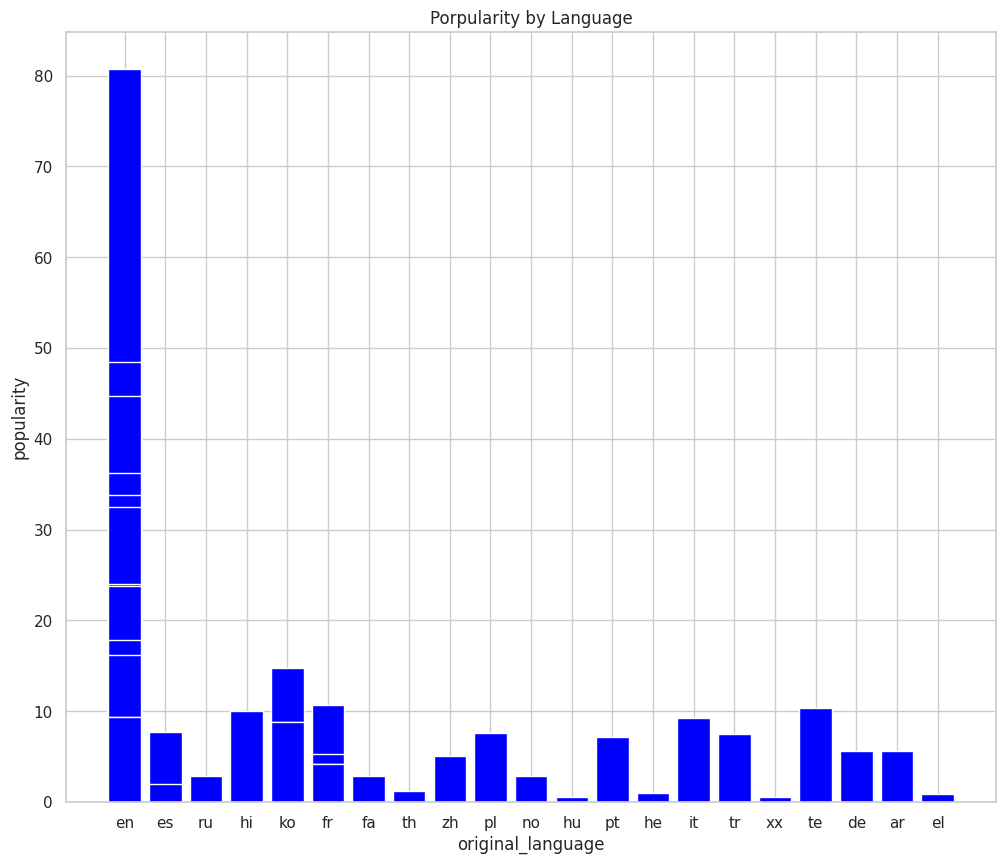

In [563]:
# Porpularity by Language
# assigning data to the x and y axis
x = df['original_language']
y= df['popularity']
# creating the plot
fig, ax = plt.subplots(figsize=(12,10))
plt.bar(x, y, color='blue')
# labeling
plt.title('Porpularity by Language')
plt.xlabel('original_language')
plt.ylabel('popularity')
plt.savefig('Language.png')

plt.show()

##**c) Genre**

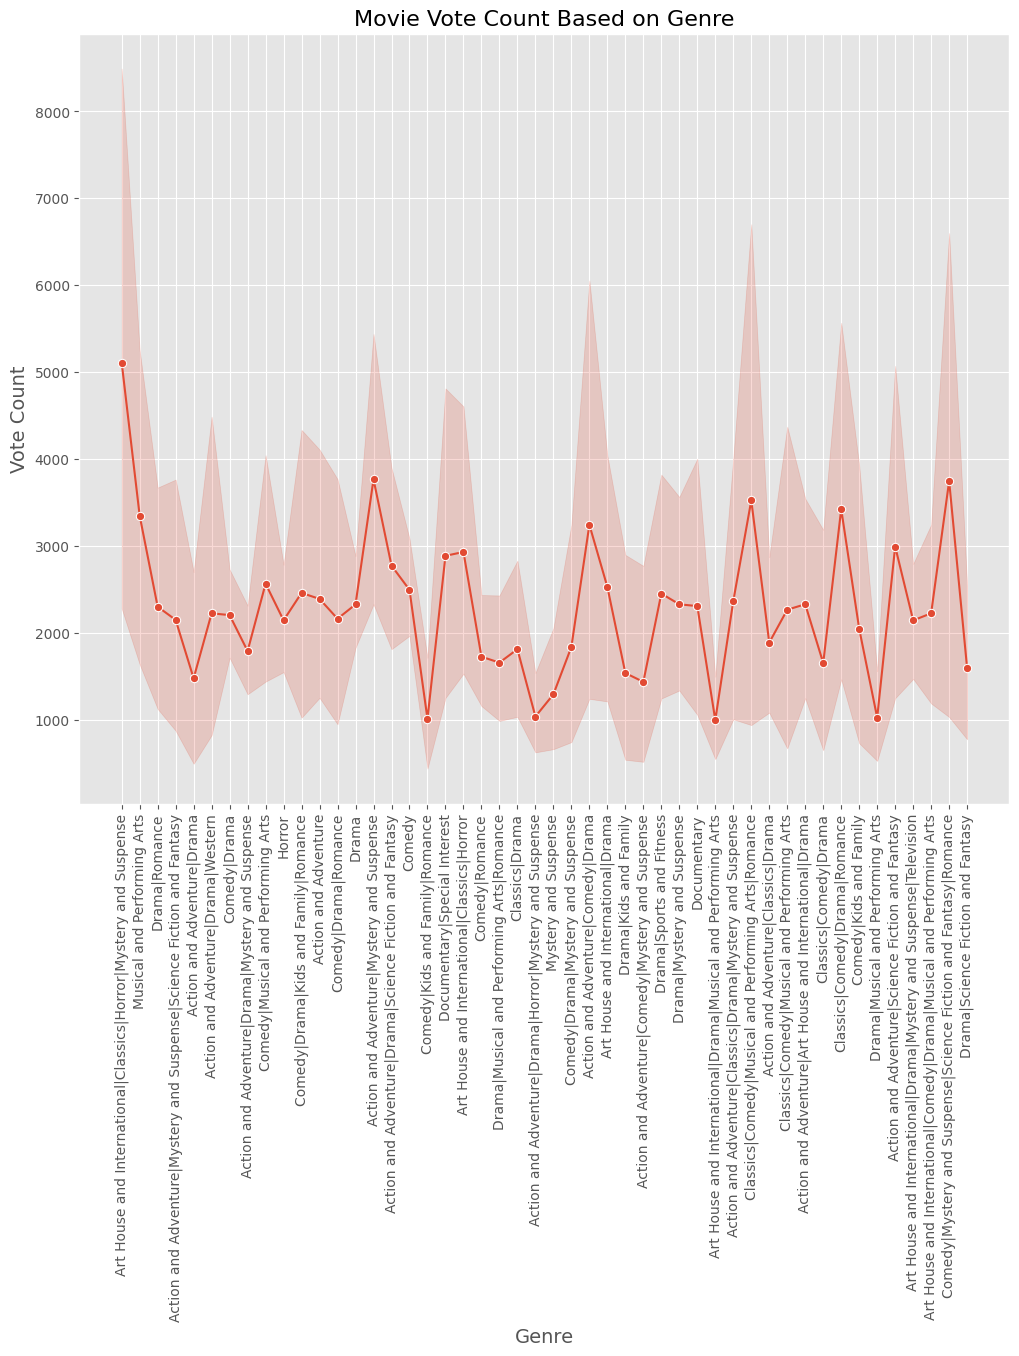

In [525]:
#Movie Vote Count Based on Genre

# Create a plot
fig, ax = plt.subplots(figsize=(12, 10))
sns.lineplot(x='genre', y='vote_count', data=df, marker='o', sort=False)

# Labeling
plt.title('Movie Vote Count Based on Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Vote Count', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

# **Correlation analysis**

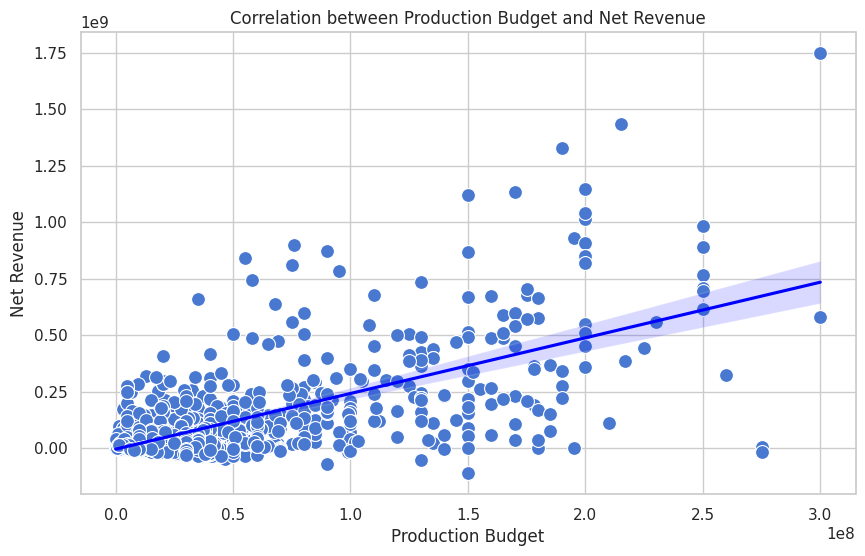

In [548]:
# Visualizing the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='production_budget', y='net_revenue',  s=100)
sns.regplot(data=df, x='production_budget', y='net_revenue', scatter=False, color='blue')
plt.title('Correlation between Production Budget and Net Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Net Revenue')
plt.show()

### **Production Budget vs. Worldwide Gross**

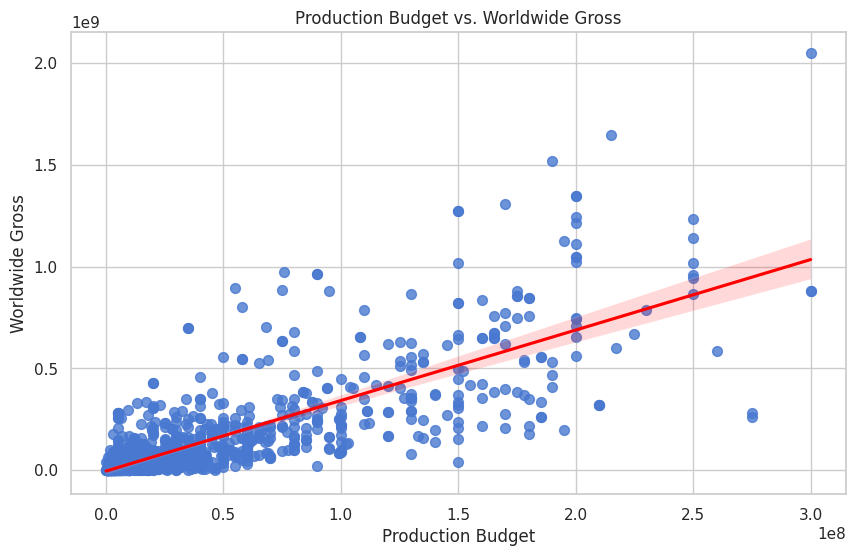

Correlation between Production Budget and Worldwide Gross: 0.79


<Figure size 640x480 with 0 Axes>

In [565]:
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()
plt.savefig('correlation1.png')
correlation_budget_gross = df[['production_budget', 'worldwide_gross']].corr().iloc[0, 1]
print(f"Correlation between Production Budget and Worldwide Gross: {correlation_budget_gross:.2f}")

## **Popularity vs. Vote Count**

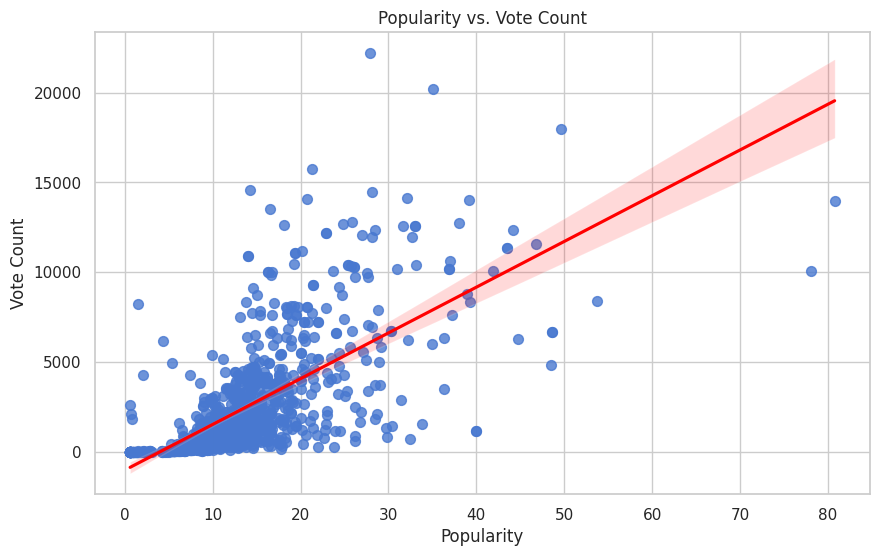

Correlation between Popularity and Vote Count: 0.69


<Figure size 640x480 with 0 Axes>

In [564]:
plt.figure(figsize=(10, 6))
sns.regplot(x='popularity', y='vote_count', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Popularity vs. Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.show()
plt.savefig('correlation2.png')

correlation_popularity_votes = df[['popularity', 'vote_count']].corr().iloc[0, 1]
print(f"Correlation between Popularity and Vote Count: {correlation_popularity_votes:.2f}")

## **Vote Average vs. Net Revenue**

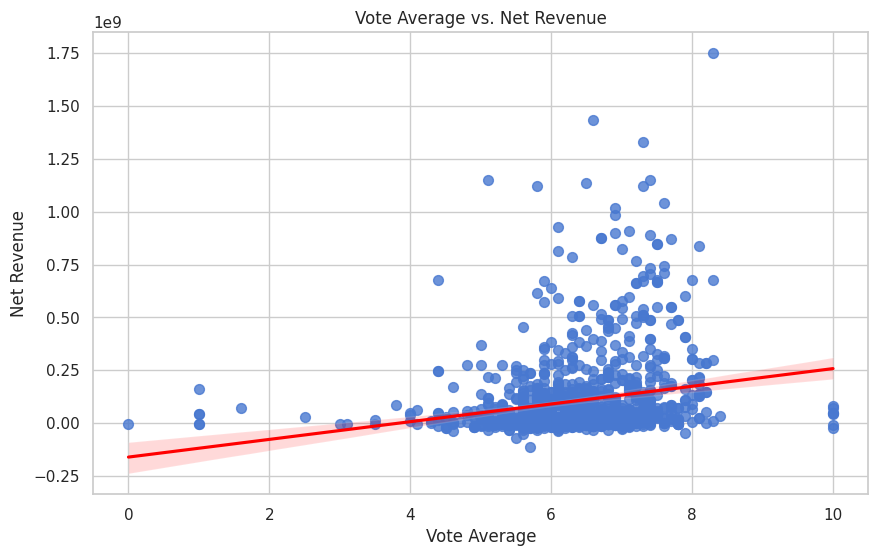

Correlation between Vote Average and Net Revenue: 0.21


<Figure size 640x480 with 0 Axes>

In [566]:
plt.figure(figsize=(10, 6))
sns.regplot(x='vote_average', y='net_revenue', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Vote Average vs. Net Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Net Revenue')
plt.show()
plt.savefig('correlation3.png')

correlation_vote_revenue = df[['vote_average', 'net_revenue']].corr().iloc[0, 1]
print(f"Correlation between Vote Average and Net Revenue: {correlation_vote_revenue:.2f}")

##**Production Budget vs. Net Revenue**

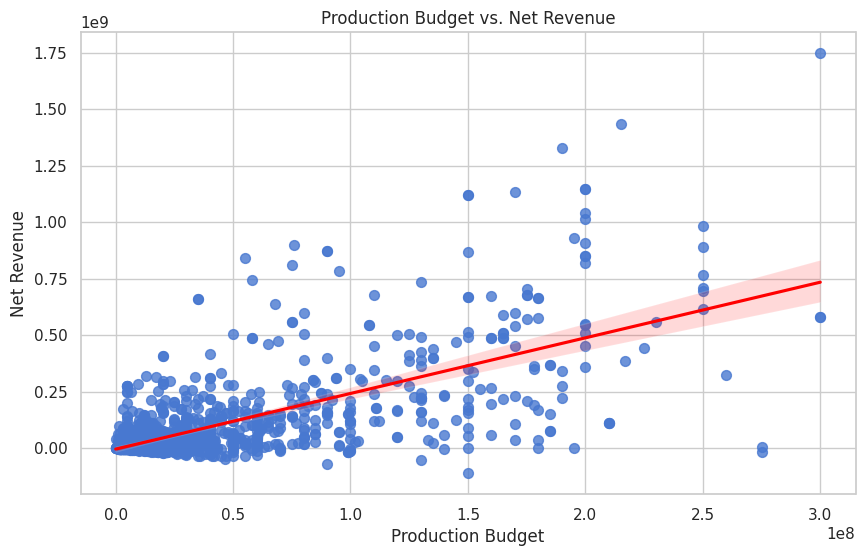

Correlation between Production Budget and Net Revenue: 0.67


<Figure size 640x480 with 0 Axes>

In [567]:
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='net_revenue', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Production Budget vs. Net Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Net Revenue')
plt.show()
plt.savefig('correlation4.png')

correlation_budget_revenue = df[['production_budget', 'net_revenue']].corr().iloc[0, 1]
print(f"Correlation between Production Budget and Net Revenue: {correlation_budget_revenue:.2f}")

## **Popularity vs. Production Budget**

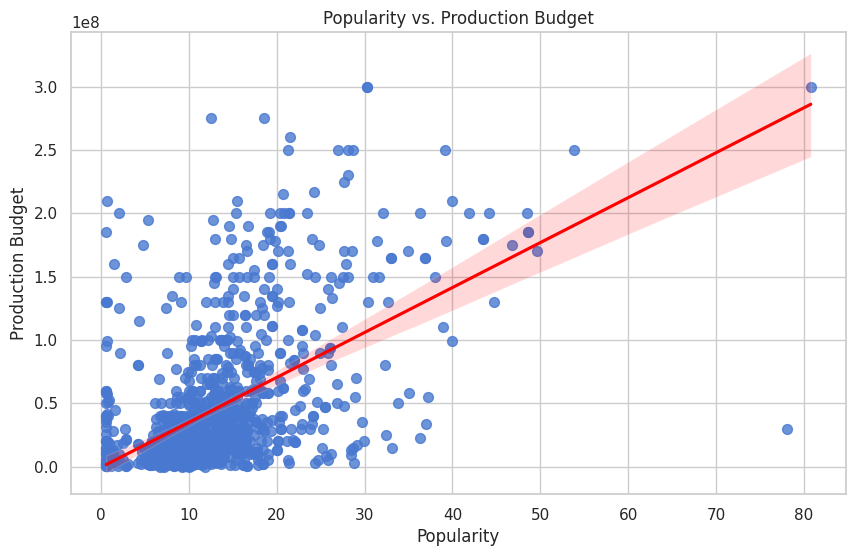

Correlation between Popularity and Production Budget: 0.53


In [551]:
plt.figure(figsize=(10, 6))
sns.regplot(x='popularity', y='production_budget', data=df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Popularity vs. Production Budget')
plt.xlabel('Popularity')
plt.ylabel('Production Budget')
plt.show()

correlation_popularity_budget = df[['popularity', 'production_budget']].corr().iloc[0, 1]
print(f"Correlation between Popularity and Production Budget: {correlation_popularity_budget:.2f}")

##**Combined Data - Numerical Features**

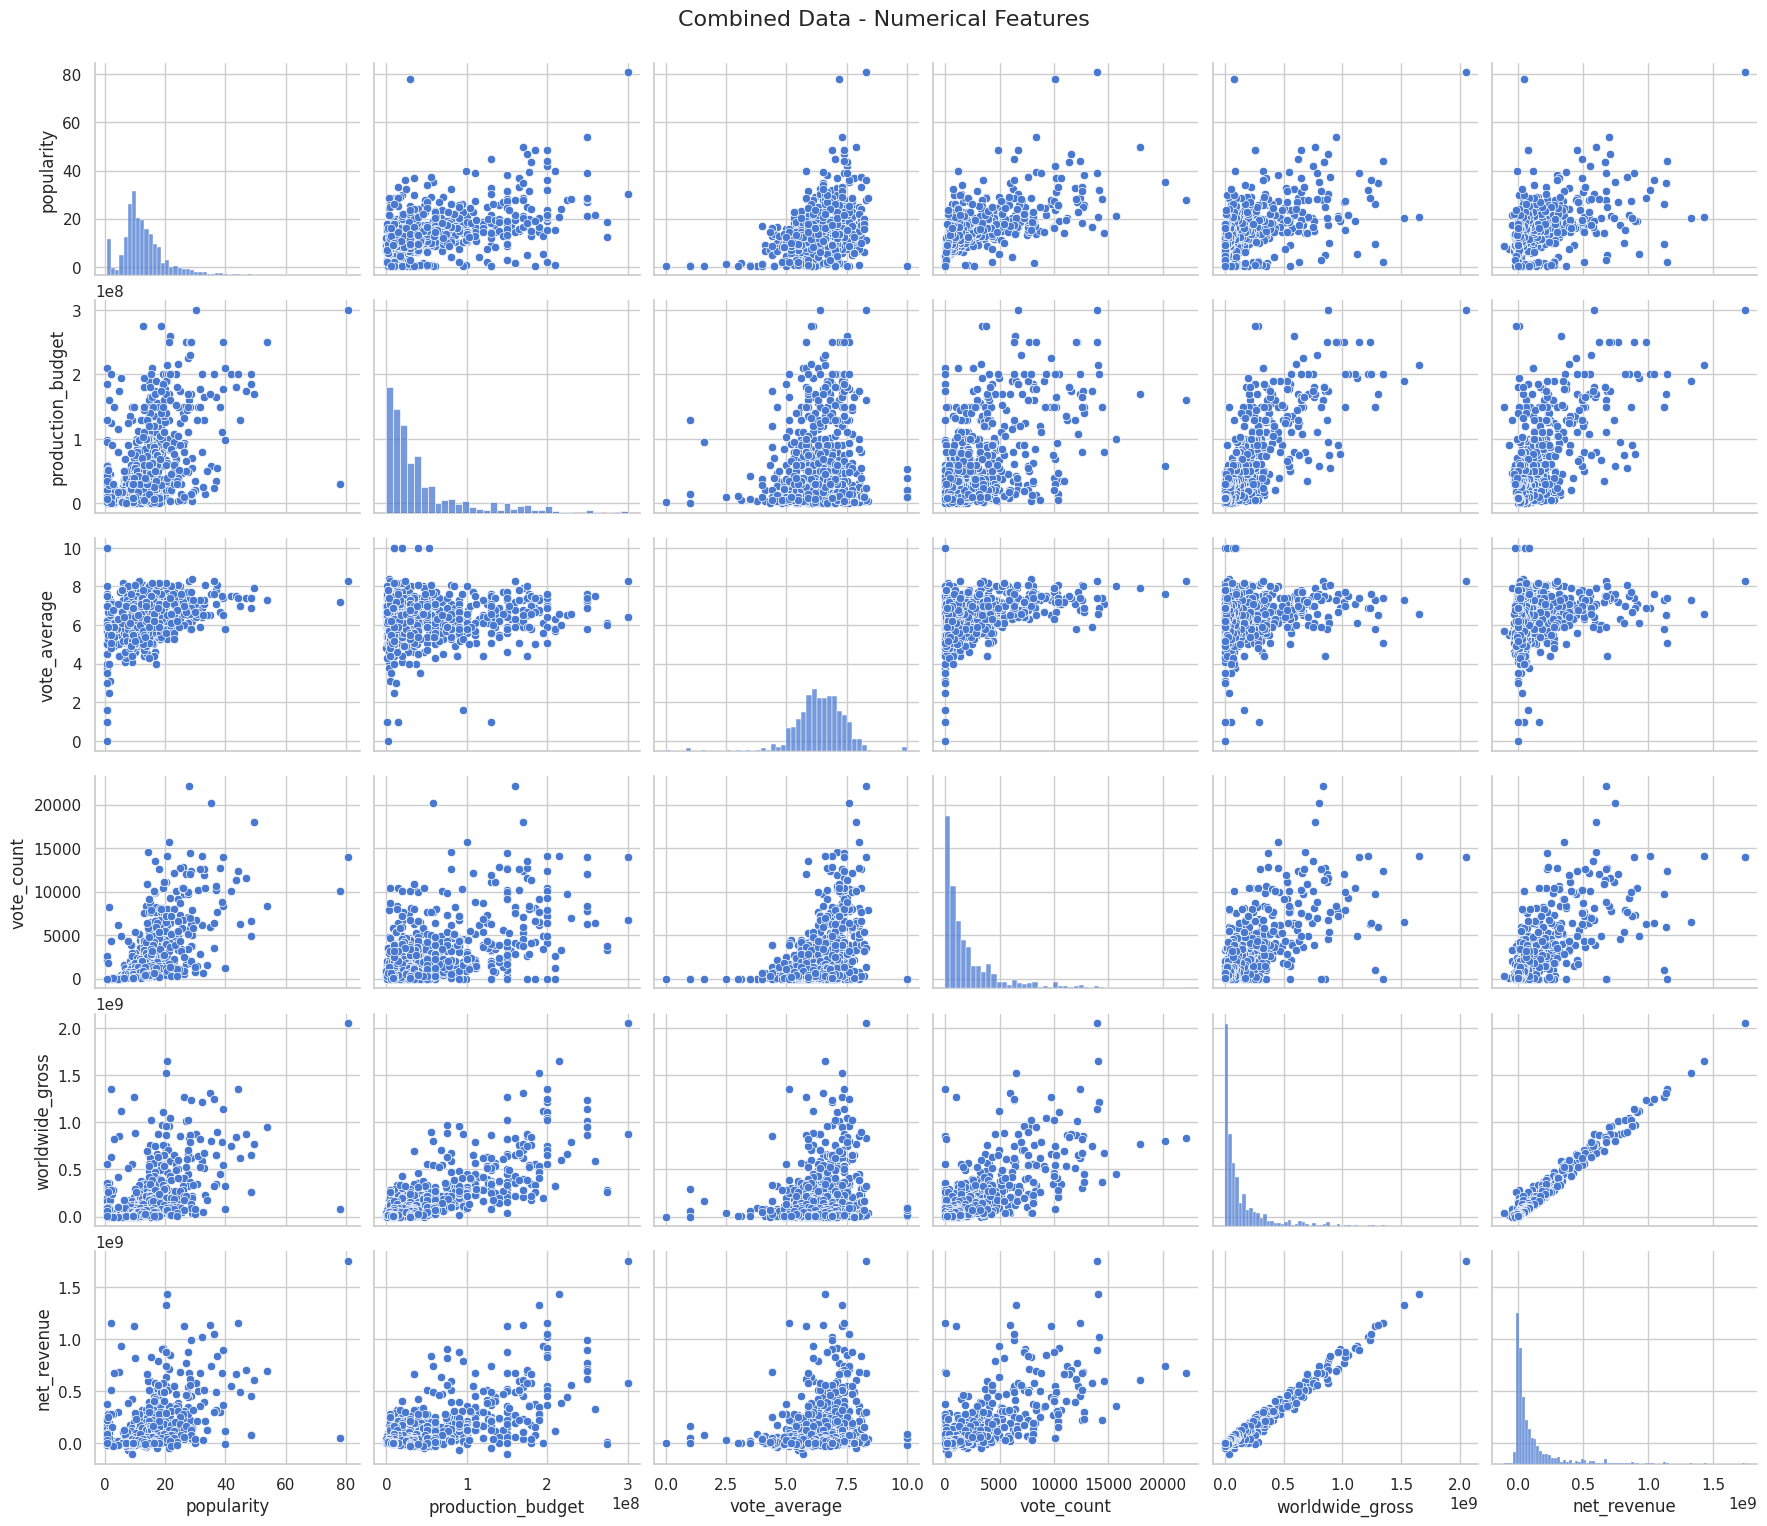

In [546]:
# visual representation of all the numerical data
numerical_columns = ['popularity', 'production_budget', 'vote_average', 'vote_count', 'worldwide_gross', 'net_revenue']

# Set the style
plt.style.use('ggplot')

# Create a pair plot with a custom size and improved aesthetics
sns.set(style='whitegrid', palette='muted', color_codes=True)
pair_plot = sns.pairplot(df[numerical_columns], height=2.5, aspect=1.2)

# Adjust the title positioning
pair_plot.fig.suptitle('Combined Data - Numerical Features', y=1.02, fontsize=16)

# Save the plot
plt.savefig('combined.png', bbox_inches='tight')

# Display the plot
plt.show()

### **Conclusions and Recommendations**


##**Key Findings**

**Top Performing Genres:**

Art House and International, Classics, Horror, and Mystery genres are performing the best at the box office.

**Language Performance:**

English is the most prominent language in successful movies.
Hungarian is among the least performing languages.

**Correlation Analysis:**

The analysis reveals a strong positive relationship between production budget and net revenue (correlation coefficient of 0.67), suggesting that higher budgets typically lead to higher net revenues. Similarly, both production budgets and net revenues have increased over the years, indicating growing investments and returns in the movie industry. The correlation between production budget and worldwide gross is even stronger at 0.79, showing that higher budgets are strongly associated with higher worldwide earnings. Additionally, there is a significant positive correlation (0.69) between popularity and vote count, indicating that more popular movies receive more votes. However, the correlation between vote average and net revenue is weak (0.21), suggesting that higher vote averages do not strongly correlate with higher net revenues. Finally, the correlation between popularity and production budget is moderate (0.53), showing that more popular movies tend to have higher production budgets.


##**Recommendations for Microsoft's New Movie Studio:**

* Prioritize Top Genres: Focus on producing movies in Art House and International, Classics, Horror, and Mystery genres, which are currently performing the best at the box office.
* Language Focus: Invest in English-language films due to their higher performance, and evaluate opportunities for other languages based on market trends.
* Budget Allocation: Allocate higher production budgets to projects with high potential for net revenue and worldwide gross. Monitor this relationship over time to optimize future budgets.
* Enhance Popularity and Engagement: Develop strategies to boost movie popularity and encourage audience engagement, as popularity strongly correlates with vote count and moderately with production budgets.
* Balance Quality and Revenue: Maintain a balance between quality and commercial appeal, as higher vote averages have a weak correlation with net revenue.
* Stay Informed on Trends: Keep updated with industry trends in production budgets and net revenue to adapt to the evolving market dynamics











